# PCA for Image Processing

In [1]:
from PIL import Image
from pylab import *
import os
import numpy as np
import cv2

## Dataset:

Resized each image to (32,24) and flattened them to (1, 768). Each image is also normalized by dividing each pixel by 255. To construct the input vector, each image is stacked one after the other. Mean centering is also done. 

In [2]:
vector = []
path = 'yalefaces/'
for image in os.listdir(path):
    if image != 'Icon' and image != '.DS_Store':
        try:
            im = array(Image.open(path + image))
            resized = cv2.resize(im, (32,24))
            resized = np.array(resized, dtype='float64')\
            .flatten()
            resized = [(1.0 * x)/255.0 for x in resized]
            vector.append(resized)
        except:
            continue
vector = np.matrix(vector)
show()
mu = np.mean(vector, axis=0)
print mu.shape
print vector.shape
vector = vector - mu
vector

(1, 768)
(165, 768)


matrix([[ 0.01970291,  0.01879976,  0.01784908, ..., -0.65166964,
         -0.49497326,  0.12420677],
        [ 0.01970291,  0.01879976,  0.01784908, ...,  0.17185977,
          0.15208556,  0.13597148],
        [ 0.01970291,  0.01879976,  0.01784908, ...,  0.0816637 ,
          0.11286988,  0.04185383],
        ..., 
        [ 0.01970291,  0.01879976,  0.01784908, ..., -0.26343434,
         -0.04791444, -0.00520499],
        [ 0.01970291,  0.01879976,  0.01784908, ...,  0.05421272,
          0.05796791,  0.04969697],
        [ 0.01970291,  0.01879976,  0.01784908, ...,  0.17185977,
          0.15600713,  0.13597148]])

In [3]:
vector.shape

(165, 768)

## Covariance, Eigenvalues and Eigenvectors:

Covariance and eigenvector for the input vector is calculated using numpy.

In [4]:
cov_mat = np.cov(vector.T)

In [5]:
eig_vals, eig_vecs = np.linalg.eigh(cov_mat)
print eig_vecs.shape

(768, 768)


## First k eigenvalues that capture 50% of energy

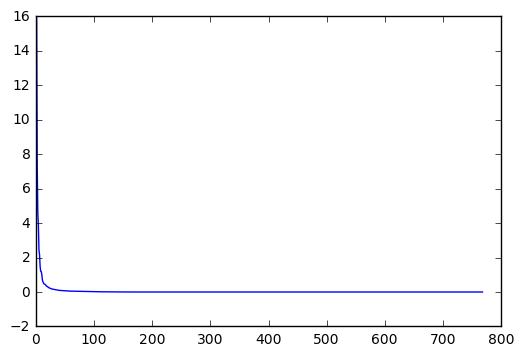

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(eig_vals)+1), eig_vals[::-1] )
plt.show()

In [8]:
sum_eig = 0
for val in eig_vals[::-1]:
    sum_eig += val
sum_k_eig = 0
count = 0
for val in eig_vals[::-1]:
    count += 1
    sum_k_eig += val
    if float(sum_k_eig)/float(sum_eig) > 0.5:
        break
print "First k eigenvalues that capture 50% energy: ", count

First k eigenvalues that capture 50% energy:  3


### The first 3 eigenvalues capture 50% of the energy

## Top 10 Eigenfaces

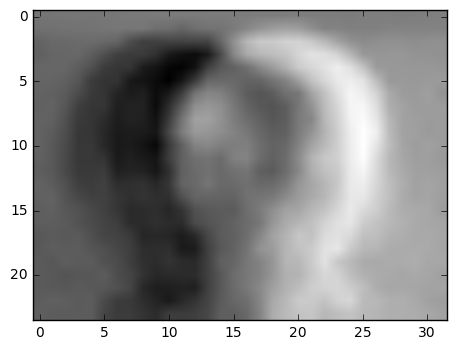

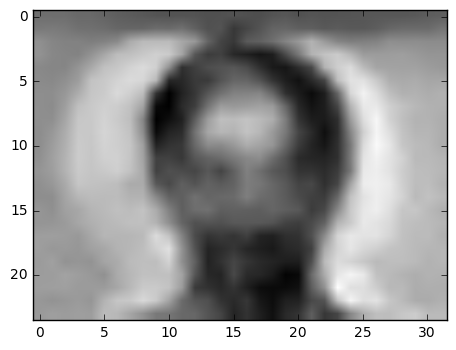

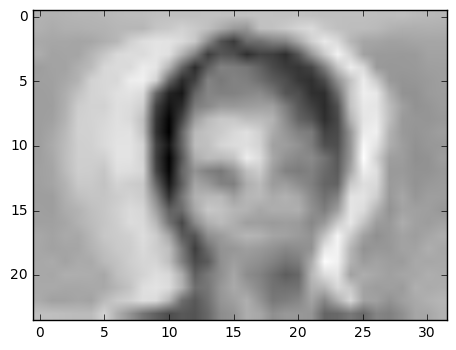

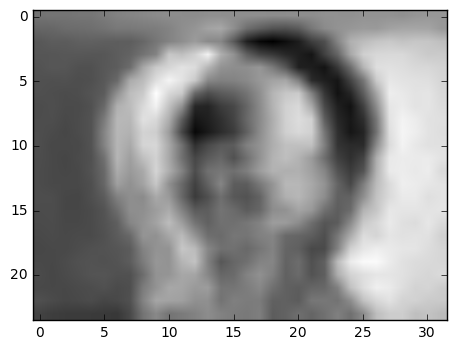

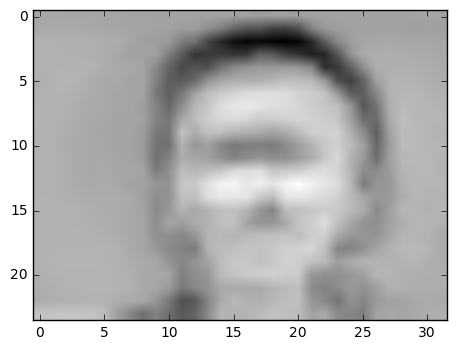

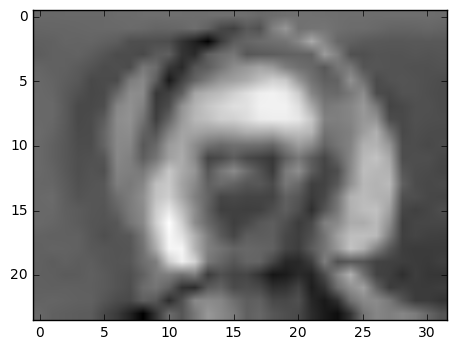

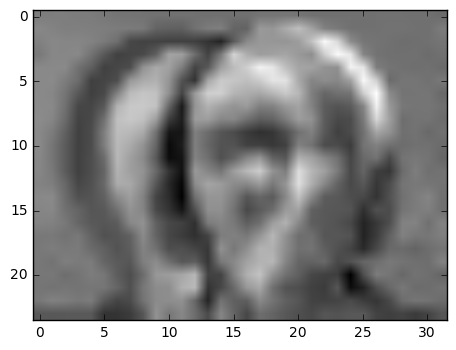

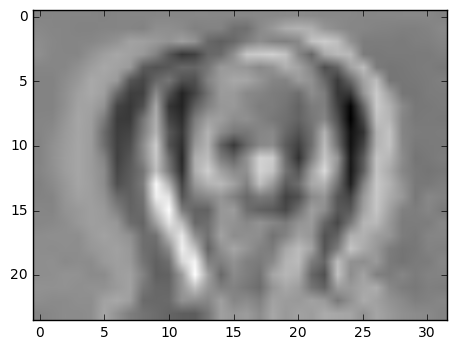

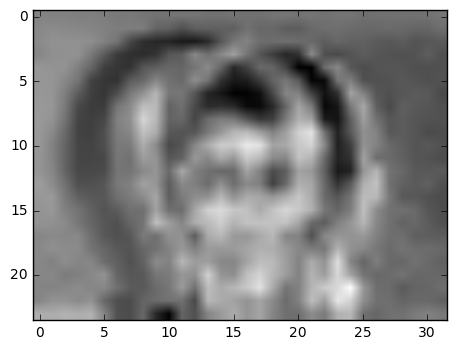

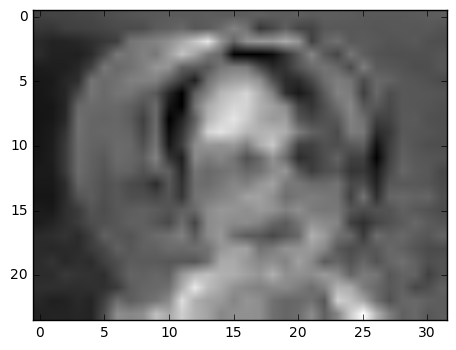

In [10]:
for i in range(10):
    imshow(eig_vecs[:, 767 - i].reshape(24, 32), cmap='gray')
    show()

## Reconstructing Images

I have reconstructed two images using the formula given in the instructions. I have done it for 1,10,20,30,40,50,100,200,500 pca components. A visually good result is obtained after 100 components.

Components =  1


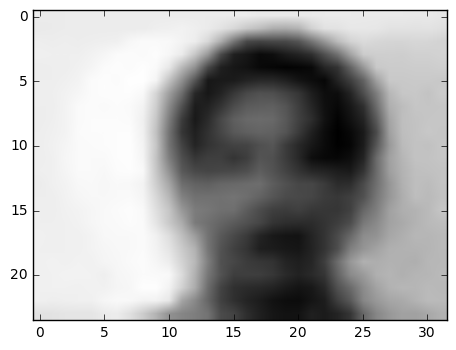

Components =  10


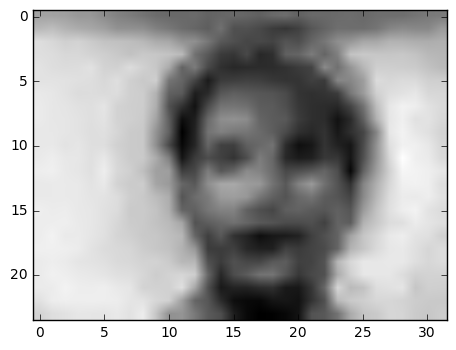

Components =  20


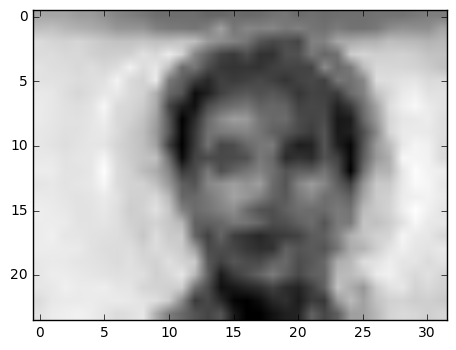

Components =  30


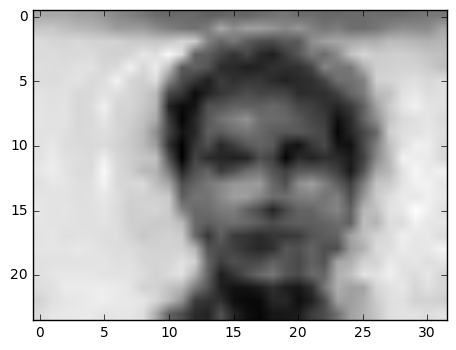

Components =  40


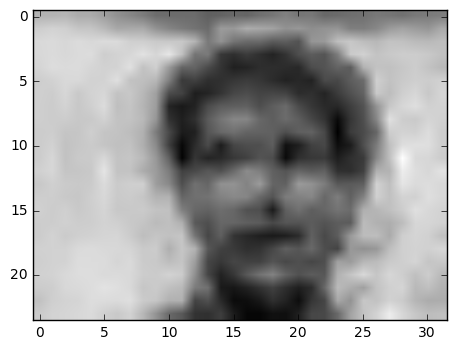

Components =  50


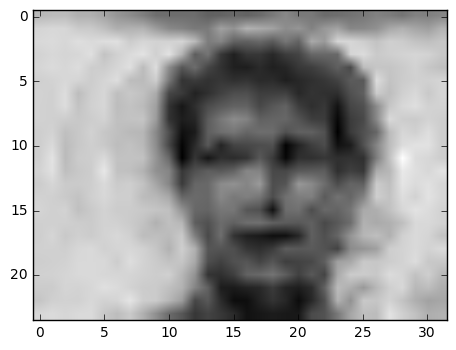

Components =  100


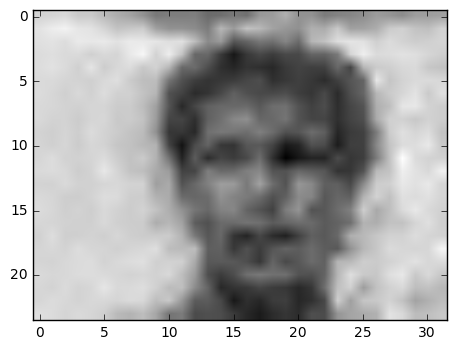

Components =  200


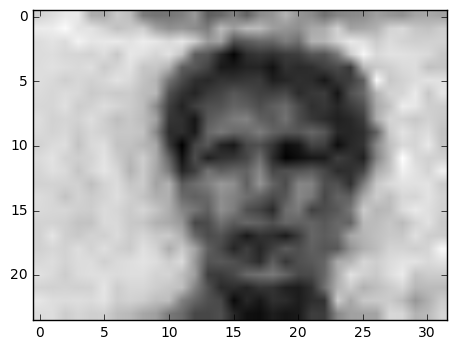

Components =  500


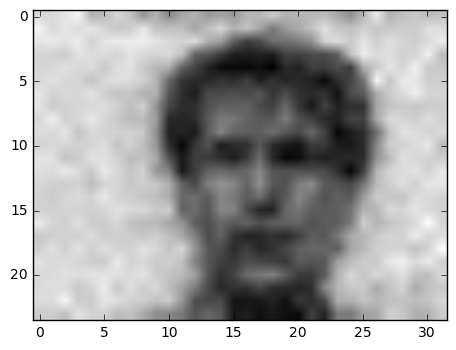

Components =  1


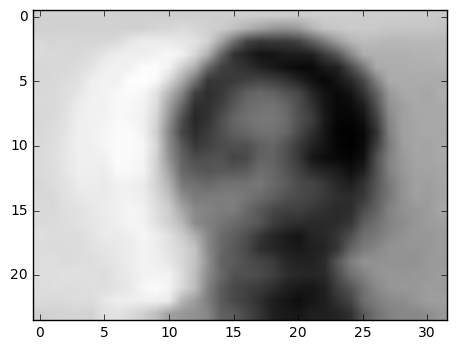

Components =  10


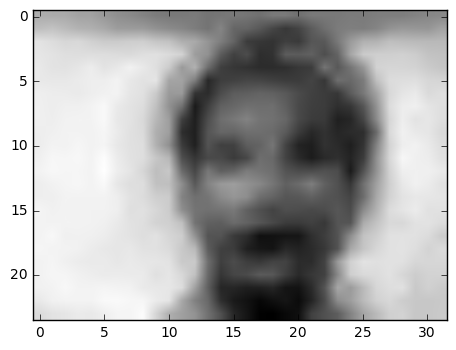

Components =  20


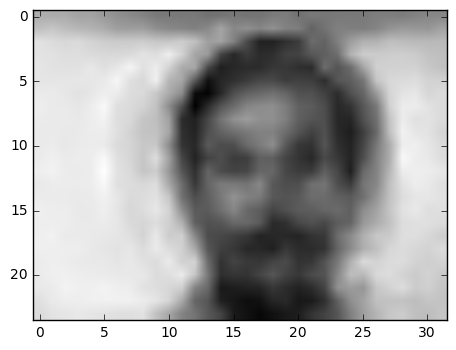

Components =  30


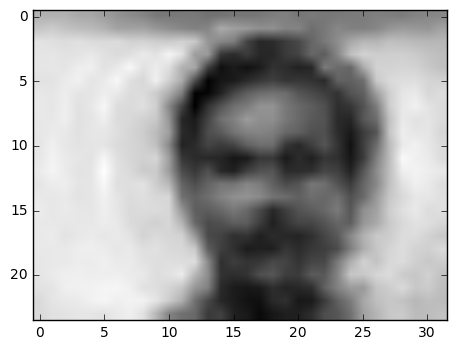

Components =  40


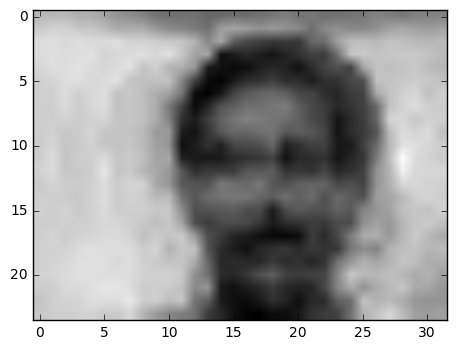

Components =  50


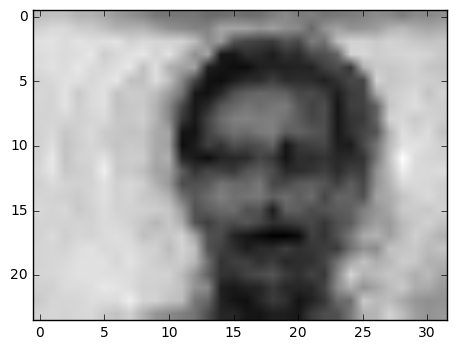

Components =  100


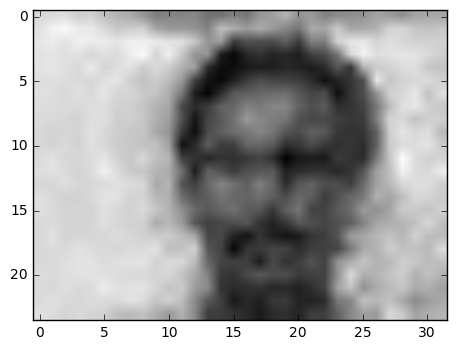

Components =  200


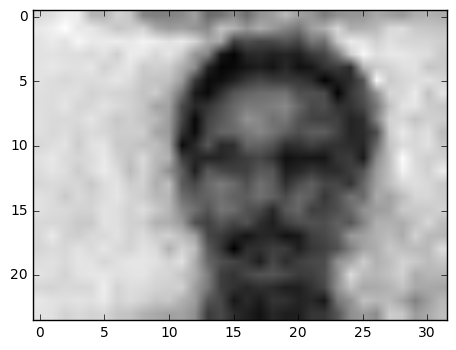

Components =  500


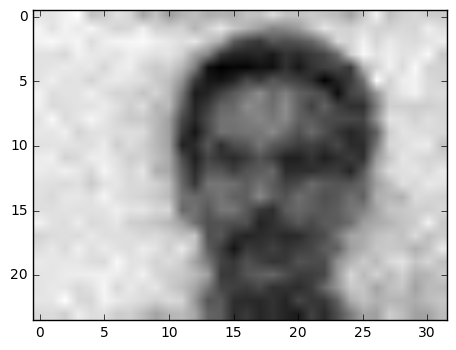

In [178]:
img1 = 'yalefaces/subject01.glasses'
img2 = 'yalefaces/subject02.glasses'

x1 = array(Image.open(img1))
x1 = cv2.resize(x1, (32,24), interpolation = cv2.INTER_AREA)
x1 = np.array(x1, dtype='float64').flatten()
x1 = [(1.0 * x)/255.0 for x in x1]
x1 = np.array(x1)

x2 = array(Image.open(img2))
x2 = cv2.resize(x2, (32,24), interpolation = cv2.INTER_AREA)
x2 = np.array(x2, dtype='float64').flatten()
x2 = [(1.0 * x)/255.0 for x in x2]
x2 = np.array(x2)


k = [1,10,20,30,40,50,100,200,500]

for val in k:
    print "Components = ", val
    face1 = np.zeros(shape=(1,768))
    for i in range(val):
        face1 += x1.dot(np.matrix(eig_vecs[:, 767-i]).\
                        T.dot(np.matrix(eig_vecs[:, 767-i])))
    face1 += mu
    face1 = face1.reshape(24,32)

    imshow(face1, cmap='gray')
    show()

for val in k:
    print "Components = ", val
    face2 = np.zeros(shape=(1,768))
    for i in range(val):
        face2 += x2.dot(np.matrix(eig_vecs[:, 767-i])\
                        .T.dot(np.matrix(eig_vecs[:, 767-i])))
    face2 += mu
    face2 = face2.reshape(24,32)

    imshow(face2, cmap='gray')
    show()

## Cross Validation

5-fold cross validation is performed for each pca component. Equal number of subjects are present in both train and test data which is done using train_test_split function in sklearn. The model is trained using SVM

In [179]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


k = [1,10,20,30,40,50,100,200,500]
bestK = k[0]
bestAcc = 0
for val in k:
    X = []
    Y = []
    eigen = []
    for i in range(val):
        eigen.append(eig_vecs[:, 767-i])
    for img in vector:
        X.append(img.dot(np.array(eigen).T))
    for image in os.listdir(path):
        try:
            Y.append(int(image.split('.')[0][-2:]))
        except Exception as e:
            continue
    Y = np.asarray(Y)
    X = np.asarray(X)
    X = X.reshape(X.shape[0], X.shape[2])
    X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.2, random_state=14)
    print "Unique No of subjects in Train Data: ", \
    len(np.unique(y_train))
    print "Unique No of subjects in Test Data: ", \
    len(np.unique(y_test))
    clf = SVC()
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print "K=", val, scores.mean()
    if scores.mean() >= bestAcc:
        bestAcc = scores.mean()
        bestK = val
print "\n"
print "Best Accuracy: ", bestAcc
print "Best K:", bestK


Unique No of subjects in Train Data:  15
Unique No of subjects in Test Data:  15
K= 1 0.344131868132
Unique No of subjects in Train Data:  15
Unique No of subjects in Test Data:  15
K= 10 0.710578754579
Unique No of subjects in Train Data:  15
Unique No of subjects in Test Data:  15
K= 20 0.7896996337
Unique No of subjects in Train Data:  15
Unique No of subjects in Test Data:  15
K= 30 0.7896996337
Unique No of subjects in Train Data:  15
Unique No of subjects in Test Data:  15
K= 40 0.8056996337
Unique No of subjects in Train Data:  15
Unique No of subjects in Test Data:  15
K= 50 0.8056996337
Unique No of subjects in Train Data:  15
Unique No of subjects in Test Data:  15
K= 100 0.765318681319
Unique No of subjects in Train Data:  15
Unique No of subjects in Test Data:  15
K= 200 0.742652014652
Unique No of subjects in Train Data:  15
Unique No of subjects in Test Data:  15
K= 500 0.577142857143


Best Accuracy:  0.8056996337
Best K: 50


#### The best accuracy is obtained for k=50 components.

## Test Accuracy

The testing accuracy is obtained for k=50 components. Accuracy = 0.757575757576

In [180]:
k = bestK
X = []
Y = []
eigen = []
for i in range(k):
    eigen.append(eig_vecs[:, 767-i])
for img in vector:
    X.append(img.dot(np.array(eigen).T))
for image in os.listdir(path):
    try:
        Y.append(int(image.split('.')[0][-2:]))
    except Exception as e:
        continue
Y = np.asarray(Y)
X = np.asarray(X)
X = X.reshape(X.shape[0], X.shape[2])
X_train, X_test, y_train, y_test = \
train_test_split(X, Y, test_size=0.2, random_state=14)
print "Unique No of subjects in Train Data: ", \
len(np.unique(y_train))
print "Unique No of subjects in Test Data: ", \
len(np.unique(y_test))
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
count = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        count += 1
print "k=", bestK, "Accuracy=", float(count)/len(y_pred)



Y = np.asarray(Y)

Unique No of subjects in Train Data:  15
Unique No of subjects in Test Data:  15
k= 50 Accuracy= 0.757575757576
